In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os as os

# make plots pretty
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)

# supress warnings
import warnings
warnings.filterwarnings('ignore')

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest

# models
from sklearn.linear_model import LogisticRegression

# scores & validation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from matplotlib.ticker import StrMethodFormatter

## Lending Club - Credit Risk Model Example
Data can be downloaded at https://www.lendingclub.com/info/download-data.action


# Task 1 - Data Import
Before we can even begin to work, we are required to load data into a pandas dataframe.  In our particular case, we have data stored in csv file and can utilize the Pandas read_csv function.

The Pandas documentation outlines various other ways to import data: https://pandas.pydata.org/pandas-docs/stable/api.html#input-output

In [2]:
# For the time constraints within this workshop, we will only import a single data file.
# - skiprows allows us to skip importing the first line of the CSV
# - skipfooter allows us to skip the last 2 lines of the CSV
df = pd.read_csv('../data/LoanStats3a.csv', skiprows=[0], skipfooter=2)

#### a) With the data imported, print out the first 5 rows of data.  
* Do you notice anything wrong with the data? 
* How can we correct this? 

In [3]:
# display first 5 rows of the dataframe
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


#### b) Print out the last 5 rows of data. 
* Do you notice anything wrong? 
* How can we correct this? 

In [4]:
# display the last 5 rows of the dataframe
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
42531,NaN,NaN,3500.0,3500.0,225.0,36 months,10.28%,113.39,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42532,NaN,NaN,1000.0,1000.0,0.0,36 months,9.64%,32.11,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42533,NaN,NaN,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42534,NaN,NaN,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
42535,NaN,NaN,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


# Task 2 - Exploratory Data Analysis (EDA)
Next, we get to know the data that we are working with.  EDAs can be exhaustive - We want to gather insights on our dataset, identify trends, discovery data anomalies, etc.

For our workshop, we will do a quick dive into several key fields to try and gain an understanding of the loans we are working with.  NOTE: This is not an exhaustive EDA.  There are plenty of deep dives that can be done on the variables present. 

#### a) Print a summary of the dataframe
* Is this useful?
* How do we correct this? 

In [5]:
# print a summary of the dataframe
# - verbose will allow us to print all columns (by default, pandas will truncate a large number of columns)
# - null_counts will allow us to print the number of non-null values within each column
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Data columns (total 145 columns):
id                                            1 non-null object
member_id                                     0 non-null float64
loan_amnt                                     42535 non-null float64
funded_amnt                                   42535 non-null float64
funded_amnt_inv                               42535 non-null float64
term                                          42535 non-null object
int_rate                                      42535 non-null object
installment                                   42535 non-null float64
grade                                         42535 non-null object
sub_grade                                     42535 non-null object
emp_title                                     39909 non-null object
emp_length                                    41423 non-null object
home_ownership                                42535 non-null object
annual_in

#### b) Print the descriptive statistics for the column named 'loan_amnt'

In [6]:
df.loan_amnt.describe()

count    42535.000000
mean     11089.722581
std       7410.938391
min        500.000000
25%       5200.000000
50%       9700.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

## Removing unneccessary data
As noted by the above summary, we have a ton of data columns within this dataset - many of which contain missing data and others which will not provide any predictive power for our model. 

In order to simplify this workshop, we will drop a large number of data columns.  The list of columns is defined below:

In [7]:
cols_to_drop = ['id', 'emp_title','desc', 'mths_since_last_delinq', 'mths_since_last_record','next_pymnt_d',
               'settlement_status', 'settlement_date',  'settlement_amount', 'settlement_percentage', 
                'settlement_term', 'debt_settlement_flag_date', 'pub_rec_bankruptcies', 'application_type',
                'annual_inc', 'verification_status', 'debt_settlement_flag', 'disbursement_method', 
                'hardship_flag', 'initial_list_status', 'pymnt_plan', 'zip_code', 'earliest_cr_line', 'title',
                'revol_util', 'last_pymnt_d', 'last_credit_pull_d', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
                'total_rec_late_fee', 'total_rec_prncp', 'funded_amnt', 'funded_amnt_inv', 'out_prncp', 'out_prncp_inv', 
                'last_pymnt_amnt',  'tax_liens', 'delinq_amnt', 'policy_code', 'collections_12_mths_ex_med', 
                'chargeoff_within_12_mths']

#### c) Drop unneccessary data columns

In [8]:
# drop columns
# - labels indicates which columns we want to drop
# - axis=1 indicates we are dropping columns
# - inplace=True indicates we will drop column immediately
df.drop(labels=cols_to_drop, axis=1, inplace=True)

#### d) Drop columns containing all null values

In [9]:
# drop columns containing null data
# - axis=1 indicates we want to drop columns
# - how=all indicates that we will only drop a column if ALL values are null
# - inplace indicates that we will remove columns from the listed dataframe rather than returning a copy
df.dropna(axis=1, how='all', inplace=True)

#### e) Drop any row containing null data
In a normal circumstance, we would take more care into retaining as much data as possible for our model.  In this workshop where we are constrained on time, we will ruthlessly drop any row containing null data. 

In [10]:
# drop data
# - axis=0 means we will drop rows
# - how=any means we will drop rows containing ANY null data
df.dropna(axis=0, how='any', inplace=True)

#### f) Display a summary of dataframe

In [11]:
# display dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41394 entries, 0 to 42514
Data columns (total 22 columns):
loan_amnt                  41394 non-null float64
term                       41394 non-null object
int_rate                   41394 non-null object
installment                41394 non-null float64
grade                      41394 non-null object
sub_grade                  41394 non-null object
emp_length                 41394 non-null object
home_ownership             41394 non-null object
issue_d                    41394 non-null object
loan_status                41394 non-null object
purpose                    41394 non-null object
addr_state                 41394 non-null object
dti                        41394 non-null float64
delinq_2yrs                41394 non-null float64
inq_last_6mths             41394 non-null float64
open_acc                   41394 non-null float64
pub_rec                    41394 non-null float64
revol_bal                  41394 non-null float64
t

## Adjusting Data Types
For the most part, Machine Learning models are only capable of handling numeric values.  We must prepare our data to ensure columns are correctly defined

### Dates
Dates cannot be interpreted by machine learning models.  However, we can take components of a date to be used in a model.  In this section we will process our issue_d column and capture information related to the issue date of a loan. 

#### g) Convert issue_d into a datetime column

In [12]:
df['issue_d'] = pd.to_datetime(df.issue_d)

#### h) Create two new features to capture the issue date 'year' and 'month'

In [13]:
df['issue_d_year'] = df.issue_d.dt.year
df['issue_d_month'] = df.issue_d.dt.month

### Categorical vs Numeric
When creating your model, you will often be faced with the challenge of deciding whether or not a value is categorical or numeric.  For example - is age a categorical value or numeric value?  Is the month in which a loan is issued a categorical value or numeric value? 

#### i) Convert the issue date year and month into a categorical value

In [14]:
df['issue_d_year'] = pd.Categorical(df.issue_d_year)
df['issue_d_month'] = pd.Categorical(df.issue_d_month)

#### j) Convert int_rate into a numerical value

In [15]:
df['int_rate'] = [pd.to_numeric(i[:-1]) for i in df.int_rate]

#### k) Covert the remaining 'object' columns into categorical values

In [16]:
## convert each object column into categorical 
for c in df.select_dtypes(include=['object']):
    df[c] = pd.Categorical(df[c])

## Identifying Default Loans
The current dataset does not provide a column that identifies whether or not a loan has defaulted.  A loan status column provides us insight into the current stats of a loan.  Looking further at the documentation online, we find that there are specific statuses that identify loans in good health.

Using these 'good health' statuses, we will create a feature that identifies whether or not a loan has defaulted, or expected to go into default. 

In [17]:
## Good loan status
good_status = [
    'Current',
    'Fully Paid',
    'Issued',
    'Does not meet the credit policy. Status:Fully Paid',
    'In Grace Period'
]

#### l) Create a new field named 'is_default' that identifies whether or not a loan is in default

In [18]:
df['is_default'] = [0 if s in good_status else 1 for s in df.loan_status]

#### j) What is the breakdown of loans (default vs non-default)? 

In [19]:
df.is_default.value_counts()

0    35211
1     6183
Name: is_default, dtype: int64

#### Lets take a look at a breakdown of default vs non-default laons

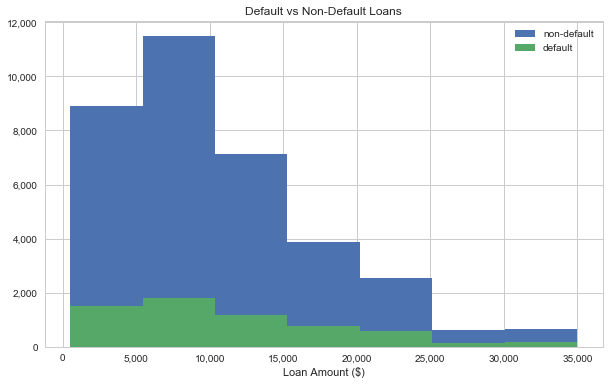

In [20]:
# determine data
default = df[df.is_default==1].loan_amnt
non_default = df[df.is_default==0].loan_amnt

fig, ax = plt.subplots(figsize=(10,6))

# create plots
ax.hist(non_default, bins=7, stacked=True, label='non-default')
ax.hist(default, bins=7, stacked=True, label='default')

# update titles
ax.set_title('Default vs Non-Default Loans')
ax.set_xlabel('Loan Amount ($)')

# setup labels
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# set legend
ax.legend()

plt.show()

### Explore Loan Interest Rates

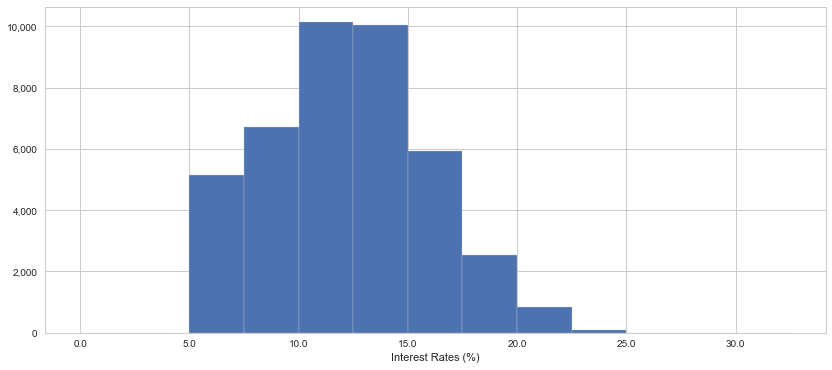

In [21]:
# setup bins
bins = np.arange(0, 35, 2.5)

fig, ax = plt.subplots(figsize=(14,6))

# create the histogram
values = df.int_rate
ax.hist(values, bins=bins, edgecolor='lightgrey')

# setup labels
ax.set_xlabel('Interest Rates (%)')
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()

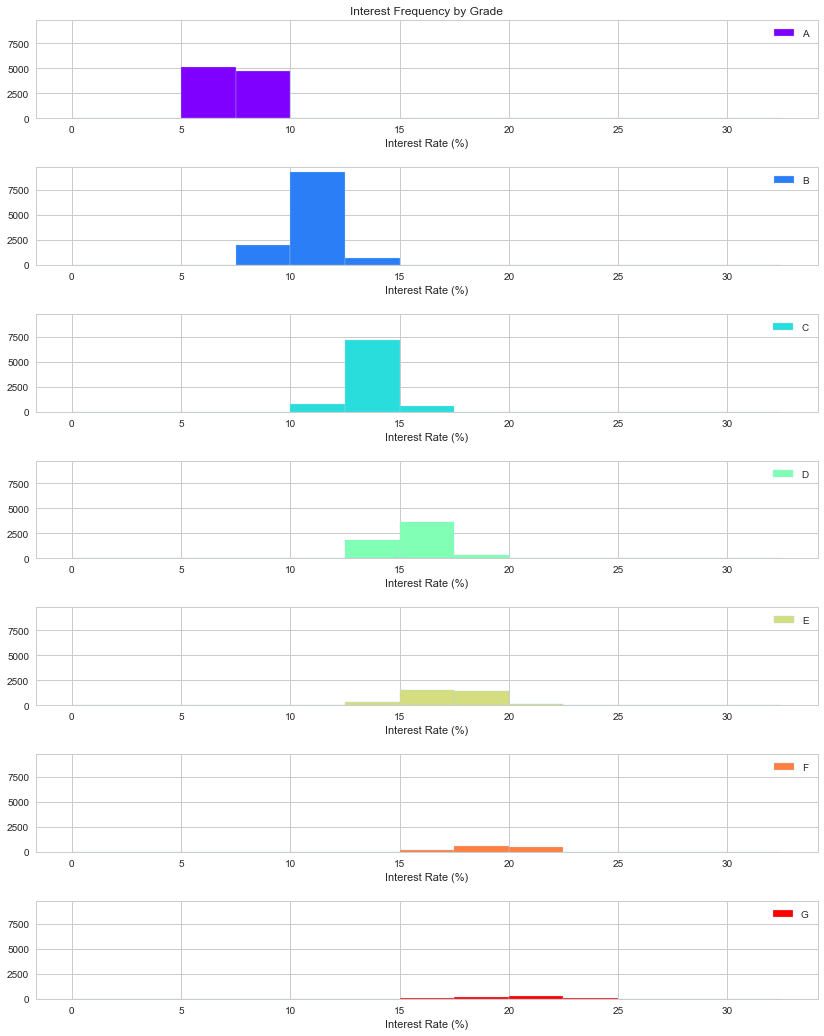

In [22]:
# find number of grades
grades = df.grade.unique()

# create a colormap to represent each grade
cm = plt.cm.rainbow
colors = cm(np.linspace(0, 1, len(grades)))

# Create a figure with nrows= total number of grades
fig, axs = plt.subplots(len(grades), sharey=True, figsize=(14,18))

# for each grade, create a graph
for i, g in enumerate(sorted(grades)):
    line = axs[i].hist(df[df.grade==g].int_rate, bins=bins, color=colors[i], label=g, edgecolor='lightblue')
    axs[i].set_xlabel('Interest Rate (%)')
    axs[i].legend()

# Set labels
axs[0].set_title('Interest Frequency by Grade')

# adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.show()

### Explore Loans by issue_d

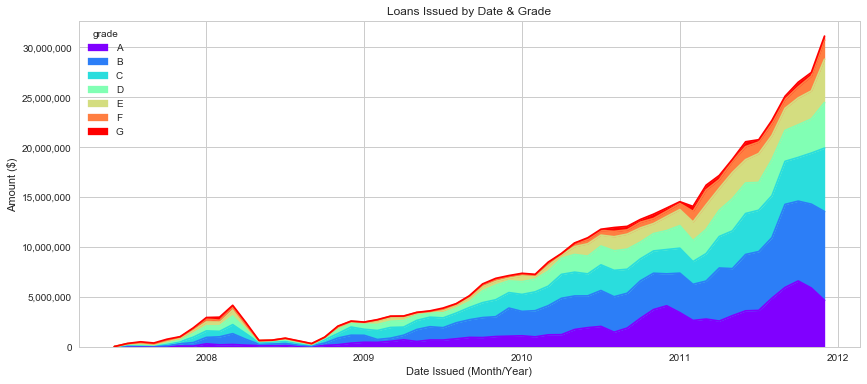

In [23]:
# find number of grades
grades = df.grade.unique()

# create a colormap to represent each grade
cm = plt.cm.rainbow
colors = cm(np.linspace(0, 1, len(grades)))

# create plot
df.groupby(['issue_d', 'grade']).loan_amnt.sum().unstack().plot.area(figsize=(14,6), color=colors)

# set labels
plt.title('Loans Issued by Date & Grade')
plt.ylabel('Amount ($)')
plt.xlabel('Date Issued (Month/Year)')

# get current axis
ax = plt.gca()

# disable scientific notation on the y axis
ax.ticklabel_format(axis='y', style='plain')

# format values with comma
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()

### Explore Loan Purpose

In [24]:
# Do we know what types of loans have the best chance of being repaid? 
loans = []

for p in df.purpose.unique():
    good = np.sum([(df.purpose==p) & (df.is_default==0)]) / np.sum(df.purpose==p)
    bad = np.sum([(df.purpose==p) & (df.is_default==1)]) / np.sum(df.purpose==p)

    loans.append([p, good, bad])

loans = pd.DataFrame(loans)
loans.columns = ['Purpose', 'Non-default', 'Default']
loans.set_index('Purpose', inplace=True)
loans.sort_values('Non-default')

,Non-default,Default
Purpose,,
small_business,0.723535,0.276465
educational,0.796610,0.203390
renewable_energy,0.806122,0.193878
house,0.830097,0.169903
other,0.830537,0.169463
medical,0.833333,0.166667
moving,0.837479,0.162521
debt_consolidation,0.845574,0.154426
vacation,0.855978,0.144022


### Exploring Loan Amounts

#### k) Create a histogram for the loan_amnts columns

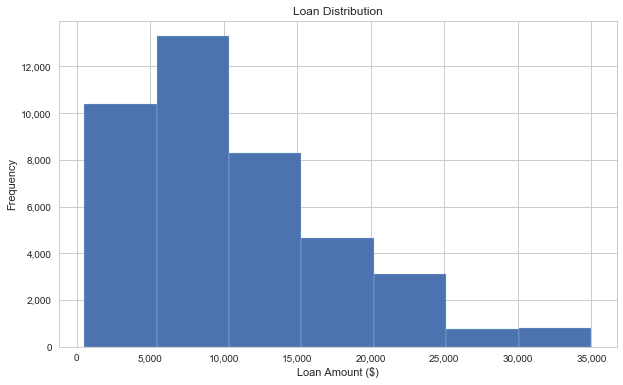

In [25]:
from matplotlib.ticker import StrMethodFormatter

# setup plot
fig, ax = plt.subplots(figsize=(10, 6))

# create graph
values = df.loan_amnt
ax.hist(values, bins=7, edgecolor='lightblue')

# setup titles
ax.set_title('Loan Distribution')
ax.set_xlabel('Loan Amount ($)')
ax.set_ylabel('Frequency')

# format ticks
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# show
plt.show()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41394 entries, 0 to 42514
Data columns (total 23 columns):
loan_amnt         41394 non-null float64
term              41394 non-null category
int_rate          41394 non-null float64
installment       41394 non-null float64
grade             41394 non-null category
sub_grade         41394 non-null category
emp_length        41394 non-null category
home_ownership    41394 non-null category
issue_d           41394 non-null datetime64[ns]
loan_status       41394 non-null category
purpose           41394 non-null category
addr_state        41394 non-null category
dti               41394 non-null float64
delinq_2yrs       41394 non-null float64
inq_last_6mths    41394 non-null float64
open_acc          41394 non-null float64
pub_rec           41394 non-null float64
revol_bal         41394 non-null float64
recoveries        41394 non-null float64
acc_now_delinq    41394 non-null float64
issue_d_year      41394 non-null category
issue_d_month 

## Correlation Matix
A correlation matix allows you to see how well the features in your model are correlated to your target variable.  The better the correlation, the more predictive power that feature contains. 

It also allows you to see features that might be correlated to one another and therefore should be removed from your model. 

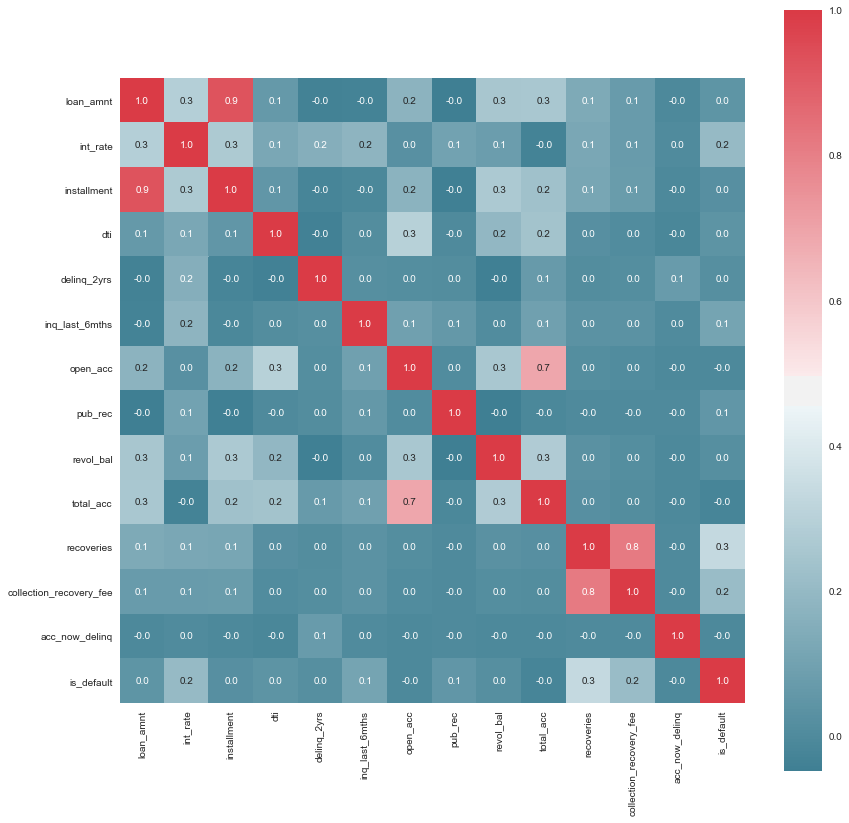

In [26]:
# create plot
f, ax = plt.subplots(figsize=(14, 14))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True, fmt='.1f')

plt.show()

### Removing Multicollinearity
In order to ensure we have a stable model, I will remove total_acc & collection_recovery_fee, which appear to have high correlation with existing variables in the model. 

In [27]:
drop_corr_feat = ['total_acc', 'collection_recovery_fee']

df.drop(labels=drop_corr_feat, axis=1, inplace=True)

## Task 3 - Model Building
We've done a fair amout of data prep already - our next step is to begin modeling building.

Our goal for this classification exercise is to create a model that predicts whether or not a loanee will default.  In order for this tomwork, we need to build a model using only completed loans (meaning loans that have been fully repaid or defaulted). 

We will filter our dataset to remove any loans that have not been completed.

#### l) Remove loans which are not in a completed_loan_status

In [28]:
completed_loan_status = ['Fully Paid', 
                         'Charged Off', 
                         'Default',
                         'Late (16-30 days)',
                         'Late (31-120 days)'
                        ]

In [29]:
model_data = df[df.loan_status.isin(completed_loan_status)].copy()

In our current dataset, we have several columns which are heavily correlated to the status of a loan.  We need to remove these values from our training data as we want to ensure we can predict default status based on data available at the time of the loan. 

Note: we will also include 'issue_d' within this list - as it is a datetime column and not required for our model.

#### j) Remove the following columns from our dataset

In [30]:
cols_to_drop = ['grade', 'sub_grade', 'issue_d', 'loan_status']

In [31]:
model_data.drop(labels=cols_to_drop, axis=1, inplace=True)

In [32]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38708 entries, 0 to 39785
Data columns (total 19 columns):
loan_amnt         38708 non-null float64
term              38708 non-null category
int_rate          38708 non-null float64
installment       38708 non-null float64
emp_length        38708 non-null category
home_ownership    38708 non-null category
purpose           38708 non-null category
addr_state        38708 non-null category
dti               38708 non-null float64
delinq_2yrs       38708 non-null float64
inq_last_6mths    38708 non-null float64
open_acc          38708 non-null float64
pub_rec           38708 non-null float64
revol_bal         38708 non-null float64
recoveries        38708 non-null float64
acc_now_delinq    38708 non-null float64
issue_d_year      38708 non-null category
issue_d_month     38708 non-null category
is_default        38708 non-null int64
dtypes: category(7), float64(11), int64(1)
memory usage: 4.1 MB


### Define Model Data (X, y)
We need to split our data into two datasets representing the features of the model (predictors) and the target (outcome).  

Remember that our machine learning model is only able to consume numeric values.  We need to convert categorical values into numbers prior to training our model. 

#### k) Define our X & y datasets
* How do the columns change after converting categorical values? 

In [33]:
## Defining model data
X = pd.get_dummies(model_data.drop(labels=['is_default'], axis=1))
y = model_data.is_default

### Train Test Split
It is important to split our data into training & testing datasets.  This allows us to validate our model using data it has never seen before. 

#### l) Split our X & Y data into training and testing datasets

In [34]:
# split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scale Data
Scaling the data ensures that values are compared on the same scale - for example, it would be hard to compare annual income and age.  Scaling the data allows us to bring these values down to a simliar scale in which the machine learning algorithm is able to weight the values approparitely. 

#### m) Define a StandardScaler.  Scale the X_train & X_test datasets

In [35]:
# Create a scaler
sc = StandardScaler()

# fit & transform the training data
X_train_scaled = sc.fit_transform(X_train)

# we only want to transform the text data
X_test_scaled = sc.transform(X_test)

### Create Classifier
Our data is ready to go.  The next step is to create a classifier.  For our example, we will utilize Logistic Regression.  

Note: It is important to evaluate the performance of multiple models as models will behave differently based on the data provided. 

#### n) Define a LogisticRegression classifier.  Fit the classifier with the appropriate training dataset

In [36]:
# fit the classifier
clf_lr = LogisticRegression()
clf_lr.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Predict
With the model fitted, we can predict results!

#### o) predict results for both the training & testing datasets

In [37]:
# predict using the test dataset
y_pred_lr = clf_lr.predict(X_train_scaled)
y_pred_lr_test = clf_lr.predict(X_test_scaled)

# find the prediction precentage for the 'default' class (which is the second column)
y_score_lr = clf_lr.predict_proba(X_train_scaled)[:,1]
y_score_lr_test = clf_lr.predict_proba(X_test_scaled)[:,1]

### Score The Results
Lets examine our predictions results in order to determine how our model is performing

In [38]:
# find the scores
accuracy_score = clf_lr.score(X_train_scaled, y_train)
roc_auc = roc_auc_score(y_train, y_score_lr)

accuracy_score_test = clf_lr.score(X_test_scaled, y_test)
roc_auc_test = roc_auc_score(y_test, y_score_lr_test)

# print scores
print('Training Scores')
print('Accuracy: {}'.format(accuracy_score))
print('ROC AUC: {}'.format(roc_auc))
print()
print('Testing Scores')
print('Accuracy: {}'.format(accuracy_score_test))
print('ROC AUC: {}'.format(roc_auc_test))

Training Scores
Accuracy: 0.946780339727443
ROC AUC: 0.9297059895423406

Testing Scores
Accuracy: 0.948333763885301
ROC AUC: 0.9085288834561438


### Print the classification report for our test predictions

In [39]:
print(classification_report(y_test, y_pred_lr_test, target_names=['0', '1']))

             precision    recall  f1-score   support

          0       0.94      1.00      0.97      6702
          1       1.00      0.62      0.76      1040

avg / total       0.95      0.95      0.94      7742



### Importance of Scoring Metrics
Looking at the accuracy & ROC AUC scores, we would think our model is performing well.  However, the classification report tells otherwise.  We are struggling to correctly classify defaulted loans.  How do we correct this? 

Let's try balancing our dataset and trying again. 

## Task 4 - SMOTE Class Balancing
Using SMOTE, we are able to bring balance to our minority class, which will hopefully improve our accuracy score.

SMOTE introduces sythetic data.  It is important to ensure that sythetic data is only introduced into our training data.

In [40]:
from collections import Counter

# display the sampled classes
print('Class distribution prior to SMOTE {}'.format(Counter(y_train)))

Class distribution prior to SMOTE Counter({0: 26566, 1: 4400})


In [41]:
from imblearn.over_sampling import SMOTE

# balance our class
sm = SMOTE(ratio='minority', random_state=42)
X_res, y_res = sm.fit_sample(X_train, y_train)

# display the sampled classes
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 26566, 1: 26566})


### Retrain & score our model

In [42]:
# scale & transform the data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_res)
X_test_scaled = sc.transform(X_test)

# fit the classifier
clf_lr_balanced = LogisticRegression()
clf_lr_balanced.fit(X_train_scaled, y_res)

# predict using the test dataset
y_pred_lr = clf_lr_balanced.predict(X_train_scaled)
y_pred_lr_test = clf_lr_balanced.predict(X_test_scaled)

# find the prediction precentage for the 'default' class (which is the second column)
y_score_lr = clf_lr_balanced.predict_proba(X_train_scaled)[:,1]
y_score_lr_test = clf_lr_balanced.predict_proba(X_test_scaled)[:,1]

# find the scores
accuracy_score = clf_lr_balanced.score(X_train_scaled, y_res)
roc_auc = roc_auc_score(y_res, y_score_lr)

accuracy_score_test = clf_lr_balanced.score(X_test_scaled, y_test)
roc_auc_test = roc_auc_score(y_test, y_score_lr_test)

# print scores
print('Training Scores')
print('Accuracy: {}'.format(accuracy_score))
print('ROC AUC: {}'.format(roc_auc))
print()
print('Testing Scores')
print('Accuracy: {}'.format(accuracy_score_test))
print('ROC AUC: {}'.format(roc_auc_test))

Training Scores
Accuracy: 0.884344651057743
ROC AUC: 0.9564516069429883

Testing Scores
Accuracy: 0.9443296305864117
ROC AUC: 0.9100270011248077


#### Print classification Report

In [43]:
print(classification_report(y_test, y_pred_lr_test, target_names=['0', '1']))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97      6702
          1       0.87      0.69      0.77      1040

avg / total       0.94      0.94      0.94      7742



Depending on your specific use case, you may want to tune your parameters to achieve better results in precision or recall.

In our specific example, is it better to 
* Provide a loan to somone who will default
* Deny a loan to someone who will not defaul

These are the questions you need to validate with your stakeholders and take into account when building your model.

**Bias is also a very big factor that needs to be tested**
* Is your model biased based on an applicants state? 
* Does your model favor a particular age range? 
* etc

### Investigate Feature Importances
Certain algorithms have the ability to print feature importances.  This allows you to see which features have strong predictive power, and conversely, which features do not have the predictive power you thought they had. 

For logistic regression, feature importances can be access from the .coef_[0] attribute

In [44]:
from operator import itemgetter

sorted(list(zip(list(X.columns), list(clf_lr_balanced.coef_[0]))), key=itemgetter(1), reverse=True)[:10]

[('recoveries', 55.29301178396711),
 ('int_rate', 0.3194664036485902),
 ('inq_last_6mths', 0.20239072070199698),
 ('dti', 0.18047660858376094),
 ('issue_d_year_2008', 0.13385560137809774),
 ('pub_rec', 0.13349311828974617),
 ('loan_amnt', 0.11468359858463253),
 ('purpose_small_business', 0.10736337174793541),
 ('term_ 60 months', 0.0979307568029307),
 ('addr_state_CA', 0.09106430569465912)]

## Task 5 - Pipelines
Pipelines allow us to streamline model building.  They allow us to string together multiple transformation steps, which ultimately feed into an estimator.  A bonus to pipelines is that they allow us to quickly swap transformations and estimators as needed.  

Each step is defined with a tuple that defines the step name and object to be invoked.

In [45]:
# Build pipeline
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

# fit the data
pipe_lr.fit(X_res, y_res)

# predict using the test dataset
y_pred_lr = pipe_lr.predict(X_res)
y_pred_lr_test = pipe_lr.predict(X_test)

# find the prediction precentage for the 'default' class (which is the second column)
y_score_lr = pipe_lr.predict_proba(X_res)[:,1]
y_score_lr_test = pipe_lr.predict_proba(X_test)[:,1]

# find the scores
accuracy_score = pipe_lr.score(X_res, y_res)
roc_auc = roc_auc_score(y_res, y_score_lr)

accuracy_score_test = pipe_lr.score(X_test, y_test)
roc_auc_test = roc_auc_score(y_test, y_score_lr_test)

# print scores
print('Training Scores')
print('Accuracy: {}'.format(accuracy_score))
print('ROC AUC: {}'.format(roc_auc))
print()
print('Testing Scores')
print('Accuracy: {}'.format(accuracy_score_test))
print('ROC AUC: {}'.format(roc_auc_test))

Training Scores
Accuracy: 0.884344651057743
ROC AUC: 0.9564516069429883

Testing Scores
Accuracy: 0.9443296305864117
ROC AUC: 0.9100270011248077


Notice that the pipeline has removed the need to scale data prior to feeding it into the pipeline.  This is because the pipeline knows how to appropriate apply scaling to incoming data.

This become powerful as you begin to add dimensionality reduction and other transformations to your pipeline. 

## Task 6 - Hyperparameter Tuning
Use hyperparameter tuning to improve model performance by selecting optimal parameters for your data.

The param_grid identifies the parameters and values which we want to test.  

In our example below, we will utilize GridSearchCV to search for the best parameters.  Note that GridSearchCV will test all possible combinations of parameters.  In cases where you have an large number of paramters - this can take an extrodinary amount of time.  Other options such as RandomizedSearchCV are available to test smaller combinations when sensitive on time.   

In [46]:
# we will do hyperparameter tuning on our logisitic regression
param_grid = [{'clf__C':[1, 10, 100, 250, 500, 750, 1000]}]

# Build pipeline
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

# create our grid search
grid_search = GridSearchCV(pipe_lr, param_grid, n_jobs=-1, scoring='roc_auc', return_train_score=False)

# perform the fit
grid_search.fit(X_train_scaled, y_res)

# print out our best params
grid_search.best_params_

{'clf__C': 10}

In [47]:
# Build pipeline
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(C=10))
])

# fit the data
pipe_lr.fit(X_res, y_res)

# predict using the test dataset
y_pred_lr = pipe_lr.predict(X_res)
y_pred_lr_test = pipe_lr.predict(X_test)

# find the prediction precentage for the 'default' class (which is the second column)
y_score_lr = pipe_lr.predict_proba(X_res)[:,1]
y_score_lr_test = pipe_lr.predict_proba(X_test)[:,1]

# find the scores
accuracy_score = pipe_lr.score(X_res, y_res)
roc_auc = roc_auc_score(y_res, y_score_lr)

accuracy_score_test = pipe_lr.score(X_test, y_test)
roc_auc_test = roc_auc_score(y_test, y_score_lr_test)

# print scores
print('Training Scores')
print('Accuracy: {}'.format(accuracy_score))
print('ROC AUC: {}'.format(roc_auc))
print()
print('Testing Scores')
print('Accuracy: {}'.format(accuracy_score_test))
print('ROC AUC: {}'.format(roc_auc_test))

Training Scores
Accuracy: 0.8909696604682678
ROC AUC: 0.9611658469617635

Testing Scores
Accuracy: 0.947300439163007
ROC AUC: 0.9165418474393406


### print classification report

In [48]:
print(classification_report(y_test, y_pred_lr_test, target_names=['0', '1']))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      6702
          1       0.89      0.70      0.78      1040

avg / total       0.95      0.95      0.94      7742



## Task 7 - Change to XGBClassifier
In order to show you the versatility of pipeline, let's go ahead a swap out LogisticRegression for XGBClassifier. I will not touch any of the other code.  When we run this, what are the results? 

In [49]:
from xgboost import XGBClassifier

In [50]:
# Build pipeline
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', XGBClassifier())
])

# fit the data
pipe_lr.fit(X_res, y_res)

# predict using the test dataset
y_pred_lr = pipe_lr.predict(X_res)
y_pred_lr_test = pipe_lr.predict(X_test)

# find the prediction precentage for the 'default' class (which is the second column)
y_score_lr = pipe_lr.predict_proba(X_res)[:,1]
y_score_lr_test = pipe_lr.predict_proba(X_test)[:,1]

# find the scores
accuracy_score = pipe_lr.score(X_res, y_res)
roc_auc = roc_auc_score(y_res, y_score_lr)

accuracy_score_test = pipe_lr.score(X_test, y_test)
roc_auc_test = roc_auc_score(y_test, y_score_lr_test)

# print scores
print('Training Scores')
print('Accuracy: {}'.format(accuracy_score))
print('ROC AUC: {}'.format(roc_auc))
print()
print('Testing Scores')
print('Accuracy: {}'.format(accuracy_score_test))
print('ROC AUC: {}'.format(roc_auc_test))

//anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
//anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training Scores
Accuracy: 0.9990401264774523
ROC AUC: 0.9998748952104101

Testing Scores
Accuracy: 0.998966675277706
ROC AUC: 0.9979157341092211


//anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
//anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [51]:
print(classification_report(y_test, y_pred_lr_test, target_names=['0', '1']))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      6702
          1       1.00      0.99      1.00      1040

avg / total       1.00      1.00      1.00      7742



## Additional topics to discuss
* Cross Validation
* Feature Engineering
* Dimensionality Reduction